## World cup 2022 predicions

### Import the data

In [16]:
import pandas as pd
winners = pd.read_csv('worldcups.csv')
winners.head()

,year,host,winner,second,third,fourth,goals_scored,teams,games,attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000
4,1954,Switzerland,West Germany,Hungary,Austria,Uruguay,140,16,26,943000


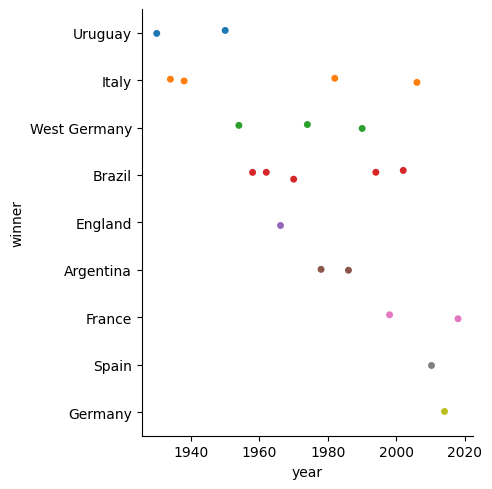

In [2]:
import seaborn as sns
sns.catplot(data = winners, x = 'year', y = 'winner')

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# I save the original data frame in a flag to then train the final pipeline
pipe_DF = winners
# Dummies for categorical columns
final_df = pd.get_dummies(winners)

In [5]:
X = final_df.drop('goals_scored',axis=1)
y = final_df['goals_scored']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [7]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

          70       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       0.0
         145       0.00      0.00      0.00       0.0
         147       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



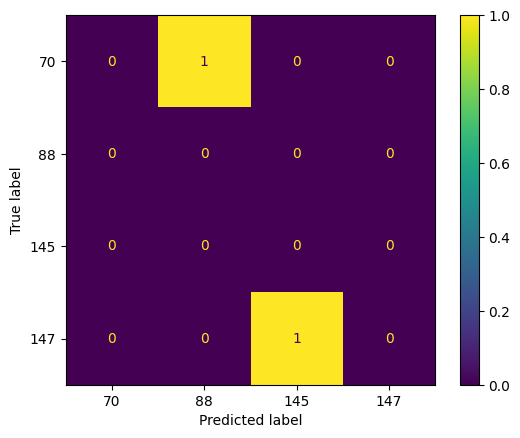

In [8]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python310\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

          70       1.00      1.00      1.00         1
         115       0.00      0.00      0.00         0
         147       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



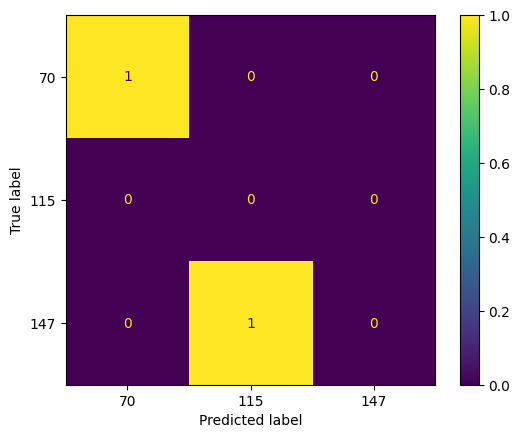

In [9]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

In [10]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

X_train.shape

(18, 71)

In [11]:
matches = pd.read_csv('wcmatches.csv')
matches.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul,Tuesday


In [12]:
df_home = matches[['home_team', 'home_score', 'away_score']]
df_away = matches[['away_team', 'home_score', 'away_score']]

df_home = df_home.rename(columns={'home_team':'Team', 'home_score': 'GoalsScored', 'away_score': 'GoalsConceded'})
df_away = df_away.rename(columns={'away_team':'Team', 'home_score': 'GoalsConceded', 'away_score': 'GoalsScored'})

df_team_strength = pd.concat([df_home, df_away], ignore_index=True).groupby(['Team']).mean()
df_team_strength


,GoalsScored,GoalsConceded
Team,,
Algeria,1.000000,1.461538
Angola,0.333333,0.666667
Argentina,1.691358,1.148148
Australia,0.812500,1.937500
Austria,1.482759,1.620690
...,...,...
Uruguay,1.553571,1.321429
Wales,0.800000,0.800000
West Germany,2.112903,1.241935


In [13]:
import pandas as pd
import pickle
from scipy.stats import poisson

In [14]:
def predict_points(home, away):
    if home in df_team_strength.index and away in df_team_strength.index:
        # goals_scored * goals_conceded
        lamb_home = df_team_strength.at[home,'GoalsScored'] * df_team_strength.at[away,'GoalsConceded']
        lamb_away = df_team_strength.at[away,'GoalsScored'] * df_team_strength.at[home,'GoalsConceded']
        prob_home, prob_away, prob_draw = 0, 0, 0
        for x in range(0,11): #number of goals home team
            for y in range(0, 11): #number of goals away team
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
        
        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0, 0)

In [15]:
print(predict_points('England', 'United States'))
print(predict_points('Argentina', 'Mexico'))
print(predict_points('Qatar (H)', 'Ecuador')) # Qatar vs Team X -> 0 points to both


(2.2356147635326007, 0.5922397535606193)
(2.3129151525530505, 0.5378377125059863)
(0, 0)
